In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScalar

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df2 = pd.read_csv(r'C:\Users\KIIT\Desktop\framingham (1).csv')
df=df2.copy()

In [3]:
df.shape

(4240, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
missing_data=df.isnull().sum()
print(missing_data)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [7]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [147]:
df['education']=df['education'].fillna(df['education'].mode().iloc[0])
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode().iloc[0])
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mean())
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [148]:
missing_data=df.isnull().sum()
print(missing_data)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [58]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

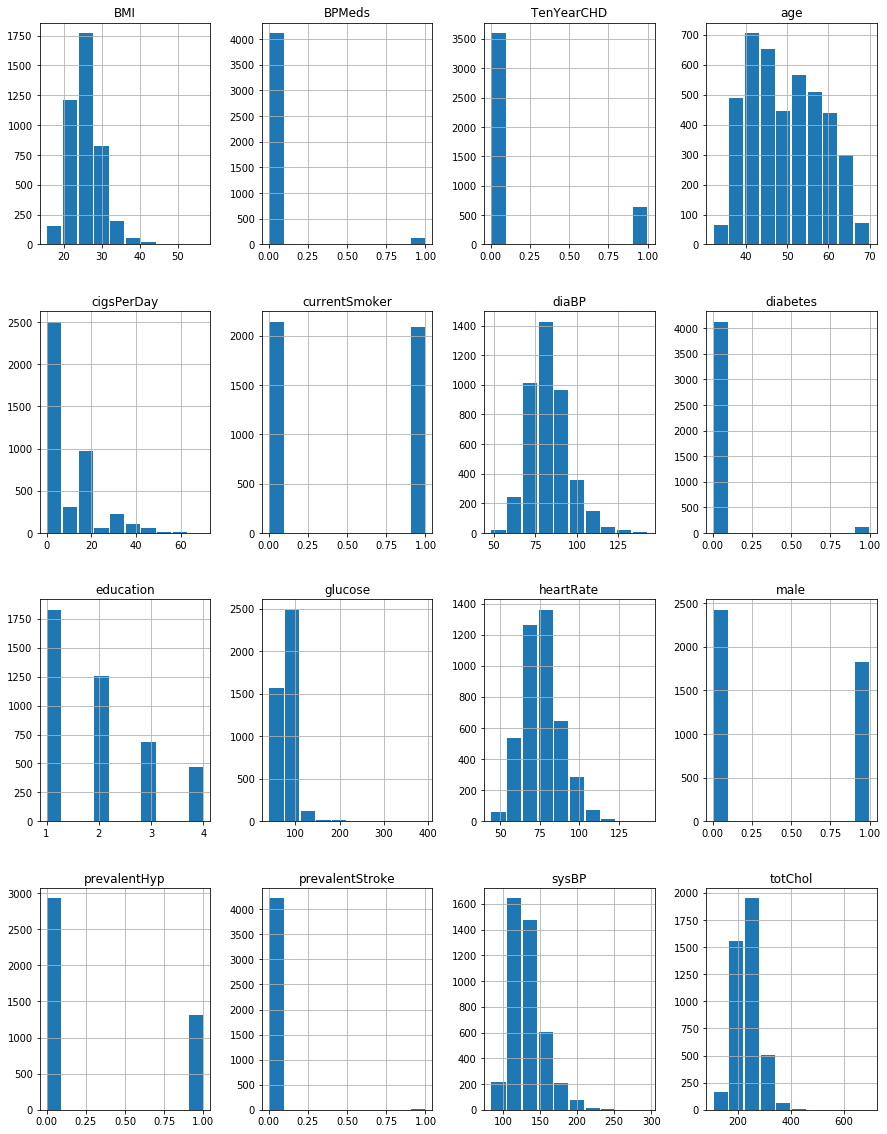

In [59]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax,rwidth=0.9)
plt.show()

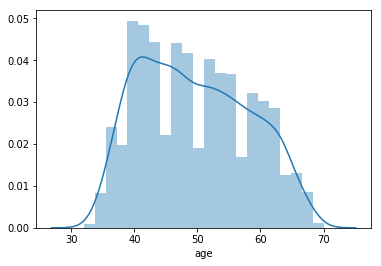

In [60]:
sns.distplot(df['age'])

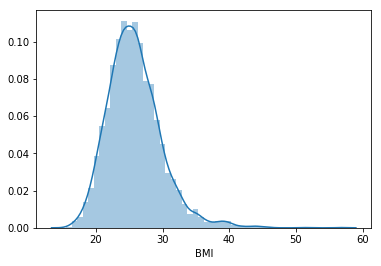

In [61]:
sns.distplot(df['BMI'])


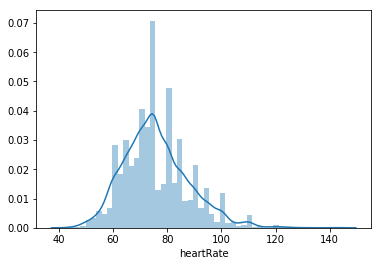

In [62]:

sns.distplot(df['heartRate'])

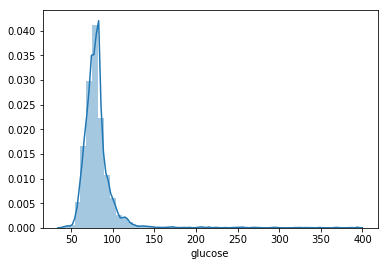

In [63]:
sns.distplot(df['glucose'])

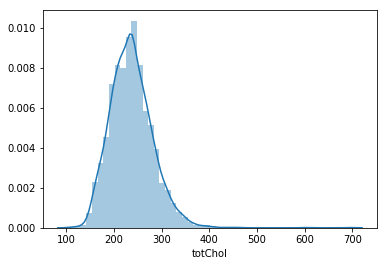

In [64]:
sns.distplot(df['totChol'])

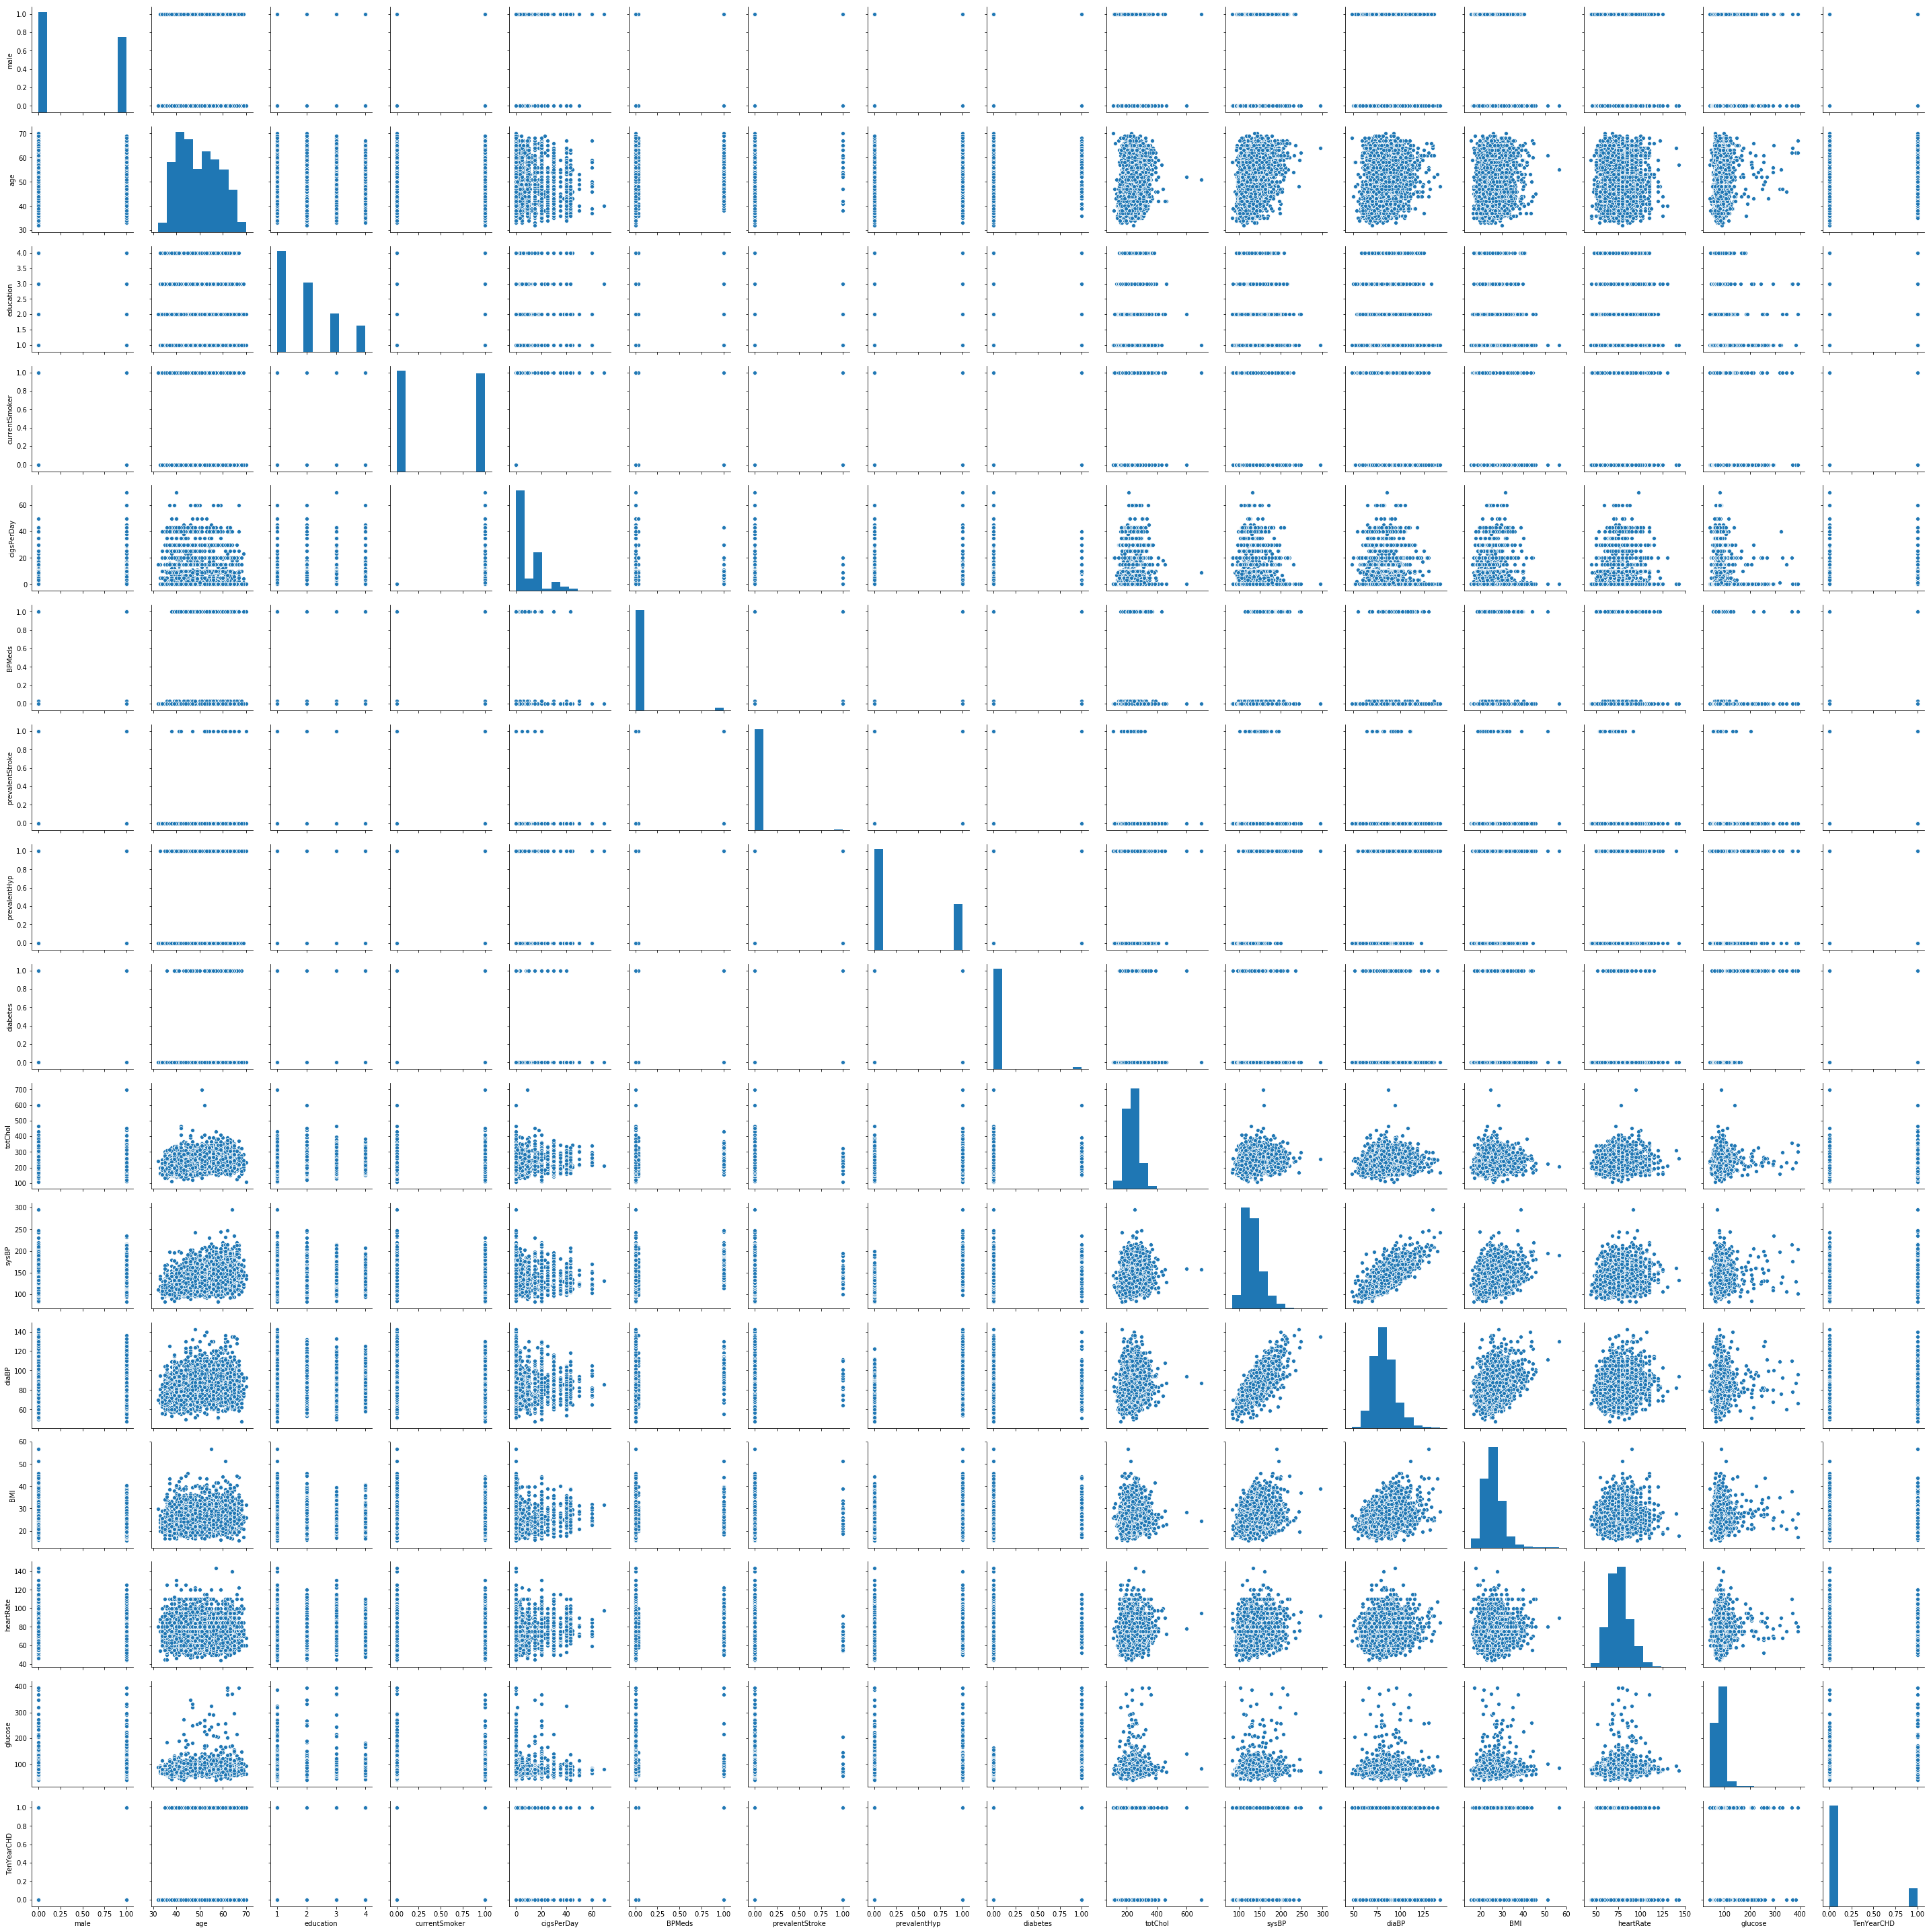

In [65]:
sns.pairplot(df)

In [66]:
corr_ma=df.corr()
print(corr_ma)

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.029014   0.013361       0.197026    0.314849   
age             -0.029014  1.000000  -0.165283      -0.213662   -0.192017   
education        0.013361 -0.165283   1.000000       0.019399    0.010145   
currentSmoker    0.197026 -0.213662   0.019399       1.000000    0.760326   
cigsPerDay       0.314849 -0.192017   0.010145       0.760326    1.000000   
BPMeds          -0.052203  0.122036  -0.010421      -0.048621   -0.044848   
prevalentStroke -0.004550  0.057679  -0.032910      -0.032980   -0.032248   
prevalentHyp     0.005853  0.306799  -0.078565      -0.103710   -0.065541   
diabetes         0.015693  0.101314  -0.038215      -0.044285   -0.036173   
totChol         -0.070064  0.260691  -0.024025      -0.046211   -0.026975   
sysBP           -0.035879  0.394053  -0.126062      -0.130281   -0.088393   
diaBP            0.058199  0.205586  -0.062334      -0.107933   -0.056768   

In [149]:
df['education']=df['education'].astype('category')
df=pd.get_dummies(df,drop_first=True)
df=df.drop(['currentSmoker','diaBP','diabetes','prevalentHyp'],axis=1)
print(df)

      male  age  cigsPerDay    BPMeds  prevalentStroke  totChol  sysBP    BMI  \
0        1   39         0.0  0.000000                0    195.0  106.0  26.97   
1        0   46         0.0  0.000000                0    250.0  121.0  28.73   
2        1   48        20.0  0.000000                0    245.0  127.5  25.34   
3        0   61        30.0  0.000000                0    225.0  150.0  28.58   
4        0   46        23.0  0.000000                0    285.0  130.0  23.10   
...    ...  ...         ...       ...              ...      ...    ...    ...   
4235     0   48        20.0  0.029615                0    248.0  131.0  22.00   
4236     0   44        15.0  0.000000                0    210.0  126.5  19.16   
4237     0   52         0.0  0.000000                0    269.0  133.5  21.47   
4238     1   40         0.0  0.000000                0    185.0  141.0  25.60   
4239     0   39        30.0  0.000000                0    196.0  133.0  20.91   

      heartRate     glucose

In [150]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[1.15311332 1.23428297 0.75141217 ... 0.64767618 0.4404882  2.82206648]
 [0.86721746 0.41766419 0.75141217 ... 1.54398144 0.4404882  0.35435026]
 [1.15311332 0.18434454 0.9287838  ... 0.64767618 0.4404882  0.35435026]
 ...
 [0.86721746 0.28229477 0.75141217 ... 1.54398144 0.4404882  0.35435026]
 [1.15311332 1.11762315 0.75141217 ... 0.64767618 2.27020839 0.35435026]
 [0.86721746 1.23428297 1.76888179 ... 0.64767618 2.27020839 0.35435026]]


In [151]:
df=df[(z < 3).all(axis=1)]
print(df)

      male  age  cigsPerDay    BPMeds  prevalentStroke  totChol  sysBP    BMI  \
0        1   39         0.0  0.000000                0    195.0  106.0  26.97   
1        0   46         0.0  0.000000                0    250.0  121.0  28.73   
2        1   48        20.0  0.000000                0    245.0  127.5  25.34   
3        0   61        30.0  0.000000                0    225.0  150.0  28.58   
4        0   46        23.0  0.000000                0    285.0  130.0  23.10   
...    ...  ...         ...       ...              ...      ...    ...    ...   
4235     0   48        20.0  0.029615                0    248.0  131.0  22.00   
4236     0   44        15.0  0.000000                0    210.0  126.5  19.16   
4237     0   52         0.0  0.000000                0    269.0  133.5  21.47   
4238     1   40         0.0  0.000000                0    185.0  141.0  25.60   
4239     0   39        30.0  0.000000                0    196.0  133.0  20.91   

      heartRate     glucose

In [152]:
X = df.drop(['TenYearCHD'],axis=1)
y = df['TenYearCHD']

In [153]:
os = RandomOverSampler(0.5)

In [154]:
x_os,y_os = os.fit_sample(X,y)#to stratify data properly

In [155]:
x_os.shape

(5061, 13)

In [122]:
y_os.shape

(5394,)

In [156]:
x_cols = X.columns

In [157]:
x_os = pd.DataFrame(x_os,columns=x_cols)

In [158]:
y_os = pd.Series(y_os,name='TenYearCHD')

In [126]:
y_os.shape

(5394,)

In [127]:
x_os.shape

(5394, 13)

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x_os,y_os,test_size=0.4,random_state=0)

In [160]:
y_test.value_counts()

0    1346
1     679
Name: TenYearCHD, dtype: int64

In [161]:
scaler = StandardScaler()

In [162]:
xs_train = scaler.fit_transform(x_train)
xs_test = scaler.fit_transform(x_test)

In [163]:
logr = LogisticRegression(class_weight='balanced',random_state=0)
model1 = logr.fit(xs_train,y_train)
y_pred1 = model1.predict(xs_test)

In [164]:
print('Accuracy score --> ',accuracy_score(y_test,y_pred1))

Accuracy score -->  0.6513580246913581


In [165]:
print('Precision score --> ',precision_score(y_test,y_pred1))

Precision score -->  0.48478015783540024


In [166]:
print('Recall score --> ',recall_score(y_test,y_pred1))

Recall score -->  0.6332842415316642


In [167]:
print('f1 score --> ',f1_score(y_test,y_pred1))

f1 score -->  0.5491698595146871


In [168]:
from sklearn.model_selection import GridSearchCV
knc = KNeighborsClassifier()
param = {'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
knc_clf = GridSearchCV(knc,param_grid=param,scoring='recall',cv=5,n_jobs=-1,verbose=3).fit(xs_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    5.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.3s finished


In [169]:
knc_clf.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [170]:
model2 = KNeighborsClassifier(n_neighbors=7,weights='distance',).fit(xs_train,y_train)
y_pred2 = model2.predict(xs_test)

In [171]:
print('Accuracy score --> ',accuracy_score(y_test,y_pred2))

Accuracy score -->  0.8429629629629629


In [172]:
print('Precision score --> ',precision_score(y_test,y_pred2))

Precision score -->  0.7259073842302879


In [173]:
print('Recall score --> ',recall_score(y_test,y_pred2))

Recall score -->  0.8541973490427098


In [174]:
print('f1 score --> ',f1_score(y_test,y_pred2))

f1 score -->  0.7848443843031122


In [176]:
svc = LinearSVC()
model3 = svc.fit(xs_train,y_train)
y_pred3 = model3.predict(xs_test)


In [177]:
accuracy_score(y_test,y_pred3)

0.6893827160493827

In [178]:
precision_score(y_test,y_pred3)

0.5739644970414202

In [179]:
recall_score(y_test,y_pred3)

0.2857142857142857

In [180]:
f1_score(y_test,y_pred3)

0.3815142576204523

In [182]:
svm = SVC(C=750,probability=True,class_weight='balanced')
model_3 = svm.fit(xs_train,y_train)
y3_pred = model_3.predict(xs_test)


In [183]:
print('Accuracy score --> ',accuracy_score(y_test,y3_pred))

Accuracy score -->  0.8251851851851851


In [184]:
print('Precision score --> ',precision_score(y_test,y3_pred))

Precision score -->  0.6874279123414071


In [185]:
print('Recall score --> ',recall_score(y_test,y3_pred))

Recall score -->  0.8777614138438881


In [186]:
print('f1 score --> ',f1_score(y_test,y3_pred))

f1 score -->  0.7710219922380336


SVC Performs better in this case when compared to Linear SVC

In [187]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight='balanced')
model4 = dtree.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)

In [188]:
print('Accuracy score --> ',accuracy_score(y_test,y_pred4))

Accuracy score -->  0.8301234567901234


In [189]:
print('Precision score --> ',precision_score(y_test,y_pred4))

Precision score -->  0.7001194743130227


In [190]:
print('Recall score --> ',recall_score(y_test,y_pred4))

Recall score -->  0.8630338733431517


In [191]:
print('f1 score --> ',f1_score(y_test,y_pred4))

f1 score -->  0.7730870712401056


In [192]:
model5 = XGBClassifier(learning_rate=0.3,colsample_bynode=0.8,subsample=0.8).fit(x_train,y_train)
y_pred5 = model5.predict(x_test)

In [193]:
print('Accuracy score --> ',accuracy_score(y_test,y_pred5))

Accuracy score -->  0.8898765432098765


In [194]:
print('Precision score --> ',precision_score(y_test,y_pred5))

Precision score -->  0.8323615160349854


In [195]:
print('Recall score --> ',recall_score(y_test,y_pred5))

Recall score -->  0.8409425625920471


In [196]:
print('f1 score --> ',f1_score(y_test,y_pred5))

f1 score -->  0.8366300366300367


In [197]:
lgb_clf = LGBMClassifier(class_weight='balanced',n_jobs=-1,n_estimators=300,subsample=0.6,colsample_bytree=0.5)
model6 = lgb_clf.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)


In [198]:
print('Accuracy score --> ',accuracy_score(y_test,y_pred6))

Accuracy score -->  0.8824691358024691


In [199]:
print('Precision score --> ',precision_score(y_test,y_pred6))

Precision score -->  0.813655761024182


In [200]:
print('Recall score --> ',recall_score(y_test,y_pred6))

Recall score -->  0.8424153166421208


In [201]:
print('f1 score --> ',f1_score(y_test,y_pred6))

f1 score -->  0.8277858176555716


In [203]:
rfcl = RandomForestClassifier(class_weight='balanced',n_estimators=250,max_features='auto')
model8 = rfcl.fit(x_train,y_train)
y_pred8 = model8.predict(x_test)

In [204]:
print('Accuracy score --> ',accuracy_score(y_test,y_pred8))

Accuracy score -->  0.9244444444444444


In [205]:
print('Precision score --> ',precision_score(y_test,y_pred8))

Precision score -->  0.939799331103679


In [206]:
print('Recall score --> ',recall_score(y_test,y_pred8))

Recall score -->  0.8276877761413843


In [207]:
print('f1 score --> ',f1_score(y_test,y_pred8))

f1 score -->  0.8801879404855129


In [210]:
gbcl = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.3,subsample=0.5,max_features=1.0)
model9 = gbcl.fit(x_train,y_train)
y_pred9 = model9.predict(x_test)

In [211]:
print('Accuracy score --> ',accuracy_score(y_test,y_pred9))

Accuracy score -->  0.8725925925925926


In [212]:
print('Parecision score --> ',precision_score(y_test,y_pred9))

Parecision score -->  0.7895460797799174


In [213]:
print('Recall score --> ',recall_score(y_test,y_pred9))

Recall score -->  0.845360824742268


In [214]:
print('f1 score --> ',f1_score(y_test,y_pred9))

f1 score -->  0.8165007112375533


Out of all models Random forest classifier nodel gives high accuracy with valid f1 score and there is no problem of overfitting, Also Lightgbm and Xgboost models are having good scores thus for given problem statement I suggest to choose these three models. 